# Verdict

Unfortunately the dataset doesn't have much displacement 
in the tasks as it's open/close/pitch/rotation, 

Rotation could be useful tho


In [3]:

import os
import numpy as np
import matplotlib.pyplot as plt
import mne

In [10]:
# Setting the mne log level to warning to reduce verbosity
mne.set_log_level('WARNING')

# Load data from .edf files in folder which contains subject edf files like Subj_01.edf, Subj_02.edf, etc.

base_folder = "/media/lolly/Bruh/MOVING_dataset/edf_with_trigger"
subject_data = {}
for filename in os.listdir(base_folder):
    if filename.endswith(".edf"):
        subject_id = filename.split('_')[1].split('.')[0]  # Extract subject ID from filename
        file_path = os.path.join(base_folder, filename)
        
        # Load the raw data using MNE
        raw = mne.io.read_raw_edf(file_path, preload=True)
        
        # Store the raw data in the dictionary
        subject_data[subject_id] = raw


Data for subject 01 loaded successfully.
<Info | 8 non-empty values
 bads: []
 ch_names: P7, P4, Cz, Pz, P3, P8, O1, O2, T8, F8, C4, F4, Fp2, Fz, C3, F3, ...
 chs: 32 EEG
 custom_ref_applied: False
 highpass: 0.1 Hz
 lowpass: 250.0 Hz
 meas_date: 2023-12-19 17:03:31 UTC
 nchan: 32
 projs: []
 sfreq: 500.0 Hz
 subject_info: <subject_info | his_id: X, sex: 2, last_name: X>
>


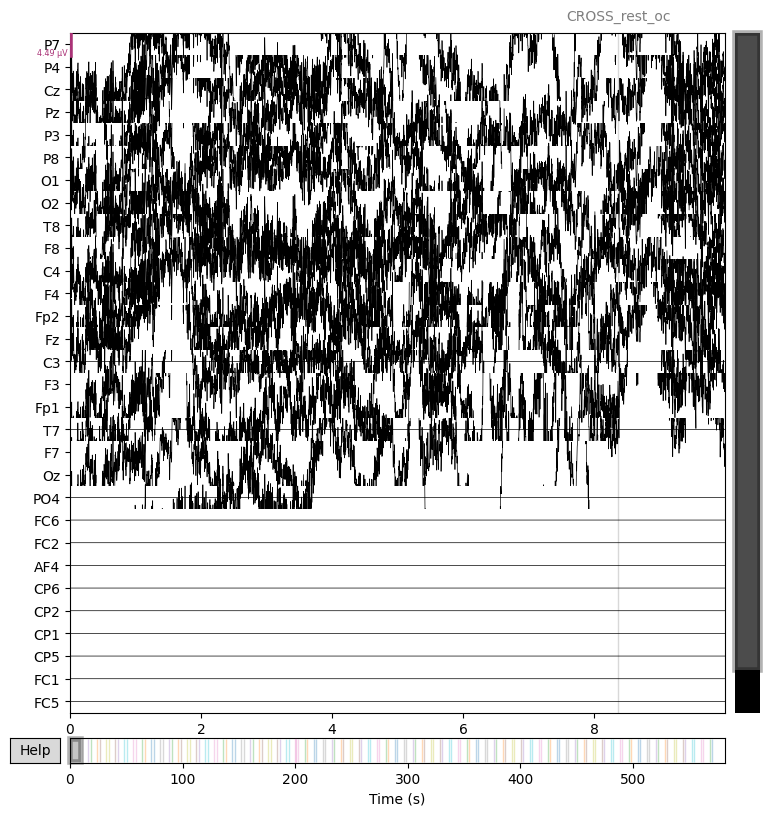

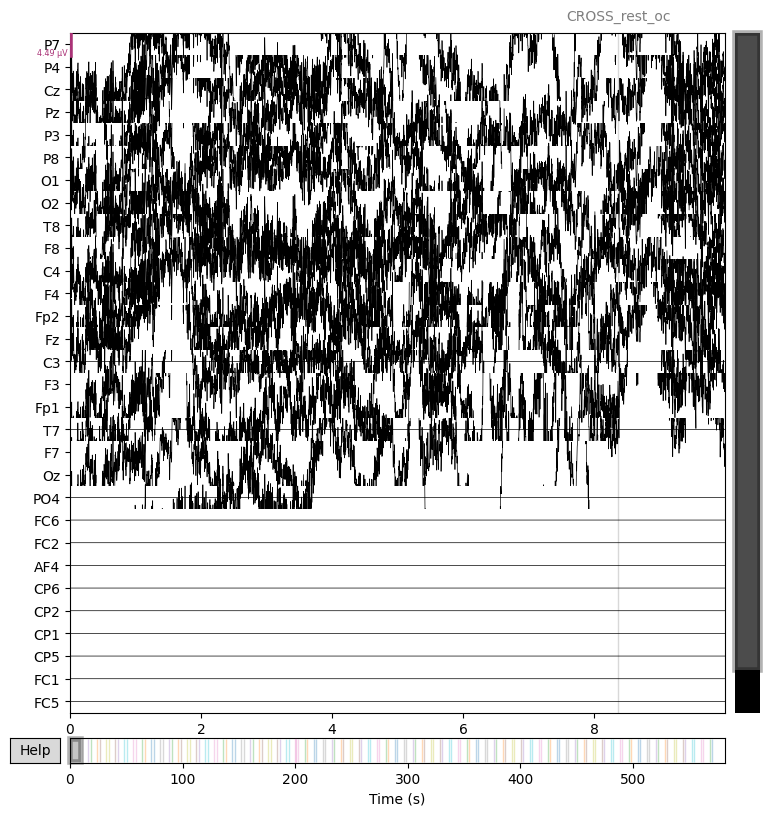

In [ ]:
# access data for a specific subject, e.g., '01'
subject = '01'
if subject in subject_data:
    raw = subject_data[subject]
    print(f"Data for subject {subject} loaded successfully.")
else:
    print(f"Subject {subject} not found in the dataset.")   

# Display basic information about the data
print(raw.info)

In [ ]:
# Loads horizontal and vertical json file from folder for a single subject
# Json files are named like Subj_01_bci_32_gesture.HorizontalLeap_undefined.json and Subj_01_bci_32_gesture.VerticalLeap_undefined.json
import json
subject = '01'
json_folder = "/media/lolly/Bruh/MOVING_dataset/virtual_glove"
horizontal_json_file = os.path.join(json_folder, f'Subj_{subject}_bci_32_gesture.HorizontalLeap_undefined.json')
vertical_json_file = os.path.join(json_folder, f'Subj_{subject}_bci_32_gesture.VerticalLeap_undefined.json')

with open(horizontal_json_file, 'r') as f:
    horizontal_kinematic_data = json.load(f)

with open(vertical_json_file, 'r') as f:
    vertical_kinematic_data = json.load(f)

print(f"Number of datapoints in horizontal kinematic data: {len(horizontal_kinematic_data)}")
print(f"Number of datapoints in vertical kinematic data: {len(vertical_kinematic_data)}")

TypeError: unhashable type: 'dict'

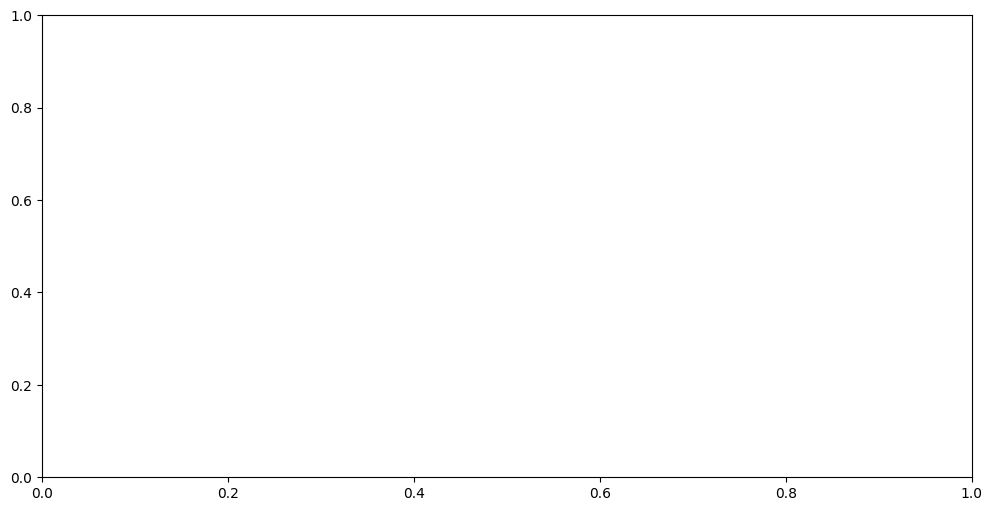

In [ ]:
# Plot the PalmPosition data from the horizontal json file
palm_positions = 
palm_positions = np.array(palm_positions)


plt.figure(figsize=(12, 6))
plt.plot(palm_positions)
plt.title('Palm Position Over Time (Horizontal Leap)')
plt.xlabel('Time (samples)')
plt.ylabel('Palm Position (x, y, z)')
plt.legend(['X', 'Y', 'Z'])
plt.show()

In [21]:
print(horizontal_kinematic_data[0]['Hands'][0].keys())

idx = 10
horizontal_hands = horizontal_kinematic_data[idx]['Hands'][0]
vertical_hands = vertical_kinematic_data[idx]['Hands'][0]

print(horizontal_hands['PalmPosition'])
print(vertical_hands['PalmPosition'])



dict_keys(['FrameId', 'Id', 'Fingers', 'PalmPosition', 'PalmVelocity', 'PalmNormal', 'Direction', 'Rotation', 'GrabStrength', 'PinchStrength', 'PinchDistance', 'PalmWidth', 'StabilizedPalmPosition', 'WristPosition', 'TimeVisible', 'Confidence', 'IsLeft', 'Arm'])
{'x': 0.14596576988697052, 'y': -0.052531443536281586, 'z': 0.17693409323692322}
{'x': 0.1403178572654724, 'y': -0.06313581019639969, 'z': 0.15264450013637543}
